In [4]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
penguins = pd.read_csv('/content/penguins.csv')
penguins.head(5)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
penguins.info()
penguins.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

<Axes: xlabel='species', ylabel='count'>

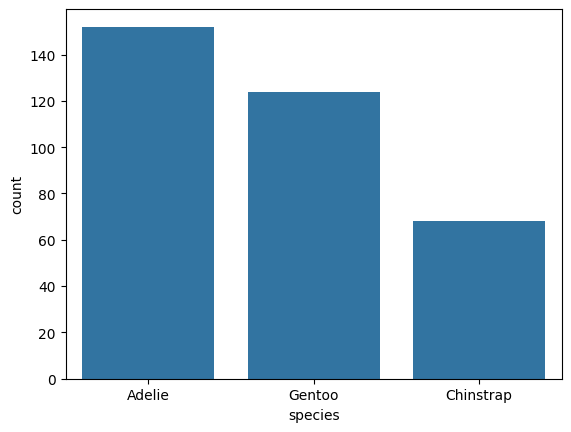

In [8]:
sns.countplot(x = "species", data = penguins)

#Adelie are the highest in number followed by Gentoo and Chintrap

<Axes: xlabel='island', ylabel='count'>

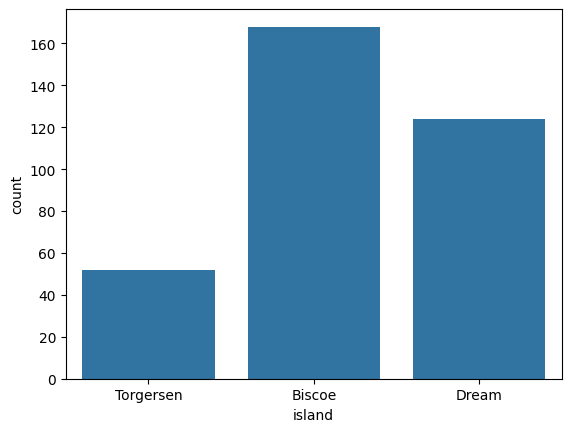

In [9]:
sns.countplot(x = "island", data = penguins)

#most of the Penguins belong to Biscoe island and least are from Torgersen

<Axes: xlabel='species', ylabel='bill_depth_mm'>

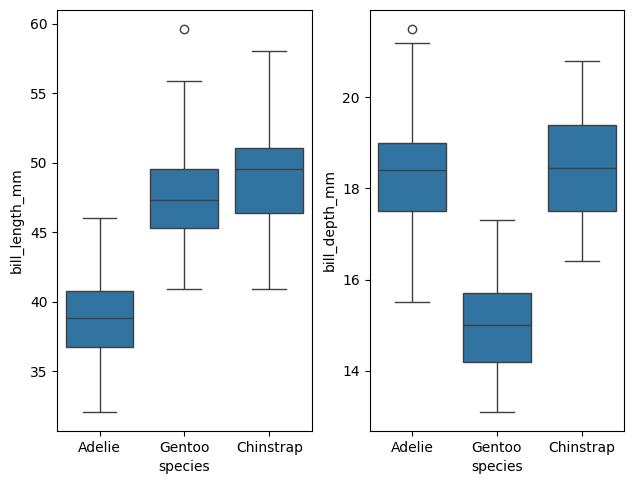

In [25]:
#culmen length and depth wrt species

fig,axs = plt.subplots(ncols = 2)
fig.tight_layout()

sns.boxplot(y= 'bill_length_mm', x = 'species', data = penguins, ax= axs[0])
sns.boxplot(y= 'bill_depth_mm', x = 'species', data = penguins, ax= axs[1])

<Axes: xlabel='species', ylabel='flipper_length_mm'>

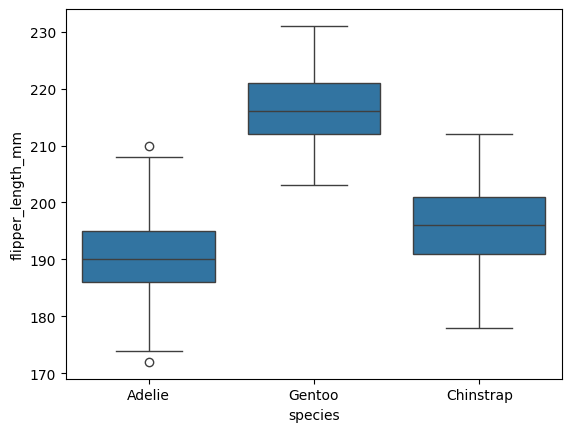

In [16]:
sns.boxplot(x = 'species', y = 'flipper_length_mm', data = penguins)

<Axes: xlabel='species', ylabel='body_mass_g'>

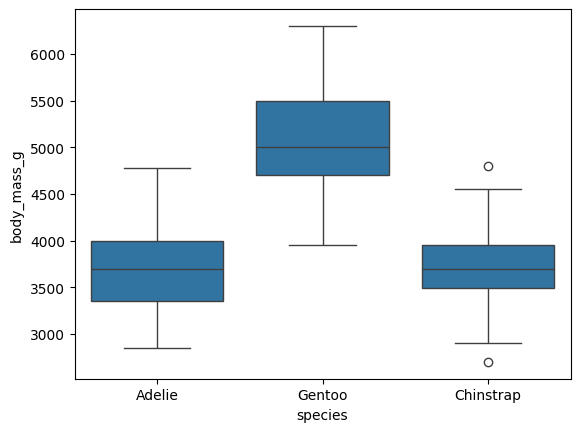

In [20]:
#body mass of different Species

sns.boxplot(x = 'species', y = 'body_mass_g', data = penguins)

#Gentoo are the heaviest of the three species whereas Adelie and Chinstrap weigh around the same

<Axes: xlabel='sex', ylabel='count'>

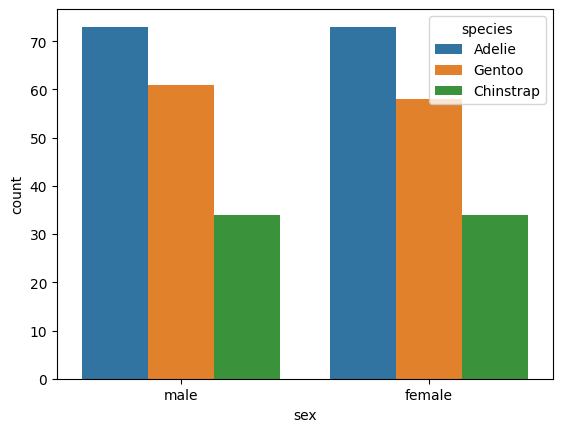

In [21]:
#Species count by sex

sns.countplot(x='sex', data = penguins, hue = 'species')

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

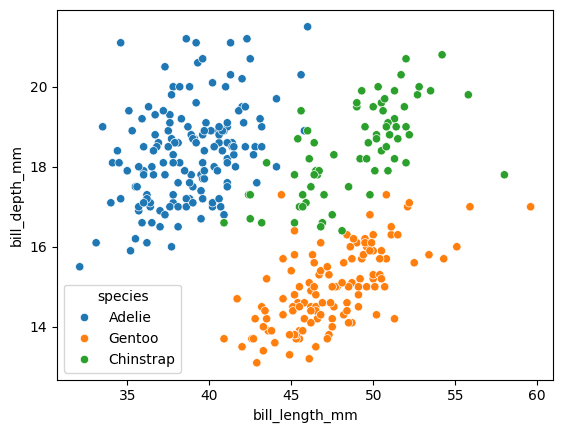

In [24]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)


In [11]:
import pandas as pd
penguins = pd.read_csv("/content/penguins.csv")
penguins["bill_length_mm"] = penguins["bill_length_mm"].fillna(value = penguins["bill_length_mm"].mean())
penguins["bill_depth_mm"] = penguins["bill_depth_mm"].fillna(value = penguins["bill_depth_mm"].mean())
penguins["flipper_length_mm"] = penguins["flipper_length_mm"].fillna(value = penguins["flipper_length_mm"].mean())
penguins["body_mass_g"] = penguins["body_mass_g"].fillna(value = penguins["body_mass_g"].mean())

penguins.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64

In [12]:
penguins["sex"] = penguins["sex"].fillna("FEMALE")

penguins.isna().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [13]:

y = penguins['species']
penguins_main = penguins.iloc[:,1:]
X = pd.get_dummies(penguins_main)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_female,sex_male
0,39.10000,18.70000,181.000000,3750.000000,2007,True,False,False,False,False,True,False,False,True
1,39.50000,17.40000,186.000000,3800.000000,2007,True,False,False,False,False,True,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,2007,True,False,False,False,False,True,False,True,False
3,43.92193,17.15117,200.915205,4201.754386,2007,True,False,False,False,False,True,True,False,False
4,36.70000,19.30000,193.000000,3450.000000,2007,True,False,False,False,False,True,False,True,False


In [14]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
labels = model.predict(X)

In [16]:
matrix = pd.DataFrame({'labels': labels, 'species': y})
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0            40         16      53
1           112         52       1
2             0          0      70


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pipeline = make_pipeline (scaler, model)

In [18]:
pipeline.fit(X)
labels_new = pipeline.predict (X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
matrix_new = pd.DataFrame({'labels': labels_new, 'species': y})
ct_new = pd.crosstab(matrix_new['labels'], matrix_new['species'])
print(ct_new)

species  Adelie  Chinstrap  Gentoo
labels                            
0           152          0       0
1             0          0     124
2             0         68       0
